In [1]:
%matplotlib inline

In [13]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck')

from halotools.empirical_models import PrebuiltSubhaloModelFactory
model = PrebuiltSubhaloModelFactory('behroozi10')

model.populate_mock(halocat)

from galsampler import halo_bin_indices

logsm_low, logmhost_low = 10, 10.25
mhost_bins = np.logspace(logmhost_low, 15.5, 25)

galaxy_mask = model.mock.galaxy_table['stellar_mass'] > 10**logsm_low
galaxy_mask *= model.mock.galaxy_table['halo_mvir_host_halo'] > 10**logmhost_low
source_galaxies = model.mock.galaxy_table[galaxy_mask]


host_halo_mask = halocat.halo_table['halo_upid'] == -1
host_halo_mask *= halocat.halo_table['halo_mvir_host_halo'] > 10**logmhost_low
source_halos = halocat.halo_table[host_halo_mask]

target_halos = halocat.halo_table[host_halo_mask]


source_halos['bin_number'] = halo_bin_indices(mass=(source_halos['halo_mvir_host_halo'], mhost_bins))
target_halos['bin_number'] = halo_bin_indices(mass=(target_halos['halo_mvir_host_halo'], mhost_bins))

In [14]:
from galsampler.end_to_end import source_galaxy_selection_indices

source_galaxies_colnames=dict(host_halo_id='halo_hostid')
nhalo_min = 50
indices = source_galaxy_selection_indices(source_galaxies, source_halos, 
                    target_halos, nhalo_min, mhost_bins, 
                    source_galaxies_colnames=source_galaxies_colnames)

sample = source_galaxies[indices]

print(sample.keys())

['halo_upid', 'halo_hostid', 'halo_mpeak', 'halo_x', 'halo_y', 'halo_id', 'halo_z', 'halo_vx', 'halo_vy', 'halo_vz', 'halo_rvir', 'halo_mvir', 'halo_mvir_host_halo', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'galid', 'stellar_mass']


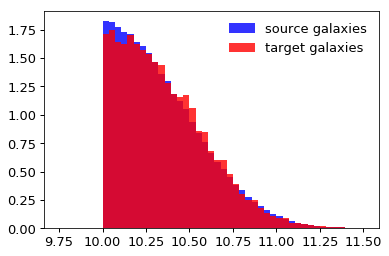

In [16]:
fig, ax = plt.subplots(1, 1)

sm_bins = np.linspace(9.75, 11.5, 50)
__=ax.hist(np.log10(source_galaxies['stellar_mass']), normed=True, bins=sm_bins, 
          alpha=0.8, color='blue', label='source galaxies')
__=ax.hist(np.log10(sample['stellar_mass']), normed=True, bins=sm_bins, 
          alpha=0.8, color='red', label='target galaxies')

legend = ax.legend()

## Prepare unit-testing catalog